In [1]:
import pandas as pd

# Load the datasets
anime = pd.read_csv("anime.csv")
ratings = pd.read_csv("rating.csv")

# Show basic info
print("Anime shape:", anime.shape)
print("Ratings shape:", ratings.shape)

anime.head()


Anime shape: (12294, 7)
Ratings shape: (7813737, 3)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
ratings.head()



,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [6]:
anime.isna().sum()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
ratings.isna().sum()


user_id     0
anime_id    0
rating      0
dtype: int64

In [8]:
anime = anime.dropna(subset=['rating'])


In [9]:
anime['genre'] = anime['genre'].fillna('Unknown')
anime['type'] = anime['type'].fillna('Unknown')


In [10]:
anime['name'] = anime['name'].str.replace('&#039;', "'", regex=False)


In [11]:
anime['genre_list'] = anime['genre'].apply(lambda x: [g.strip() for g in x.split(',')])


In [12]:
anime.head()


,anime_id,name,genre,type,episodes,rating,members,genre_list
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[Sci-Fi, Thriller]"
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ..."


In [13]:
anime[anime['name'].str.contains("One Piece", case=False)]


,anime_id,name,genre,type,episodes,rating,members,genre_list
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862,"[Action, Adventure, Comedy, Drama, Fantasy, Sh..."
143,4155,One Piece Film: Strong World,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.42,85020,"[Action, Adventure, Comedy, Drama, Fantasy, Sh..."
163,12859,One Piece Film: Z,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.39,76051,"[Action, Adventure, Comedy, Drama, Fantasy, Sh..."
212,31490,One Piece Film: Gold,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.32,18642,"[Action, Adventure, Comedy, Drama, Fantasy, Sh..."
231,19123,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,8.29,17247,"[Action, Adventure, Comedy, Drama, Fantasy, Sh..."
241,15323,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,8.27,24707,"[Action, Adventure, Comedy, Drama, Fantasy, Sh..."
352,8740,One Piece Film: Strong World Episode 0,"Action, Adventure, Comedy, Fantasy, Shounen, S...",OVA,1,8.16,33862,"[Action, Adventure, Comedy, Fantasy, Shounen, ..."
430,25161,One Piece 3D2Y: Ace no shi wo Koete! Luffy Nak...,"Adventure, Comedy, Fantasy, Shounen",Special,1,8.09,30516,"[Adventure, Comedy, Fantasy, Shounen]"
753,16239,One Piece: Episode of Luffy - Hand Island no B...,"Action, Adventure, Comedy, Fantasy, Shounen, S...",Special,1,7.86,21489,"[Action, Adventure, Comedy, Fantasy, Shounen, ..."
896,31289,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,7.78,11922,"[Action, Adventure, Comedy, Drama, Fantasy, Sh..."


In [14]:
anime.describe()

,anime_id,rating,members
count,12064.000000,12064.000000,1.206400e+04
mean,13704.476044,6.473902,1.827952e+04
std,11260.369521,1.026746,5.527578e+04
min,1.000000,1.670000,1.200000e+01
25%,3409.250000,5.880000,2.210000e+02
50%,10004.000000,6.570000,1.539000e+03
75%,23863.500000,7.180000,9.485500e+03
max,34519.000000,10.000000,1.013917e+06


In [15]:
from collections import Counter

genre_counter = Counter()

for genres in anime['genre_list']:
    genre_counter.update(genres)

genre_counter.most_common(15)


[('Comedy', 4575),
 ('Action', 2768),
 ('Adventure', 2316),
 ('Fantasy', 2242),
 ('Sci-Fi', 2036),
 ('Drama', 1977),
 ('Shounen', 1684),
 ('Kids', 1598),
 ('Romance', 1437),
 ('Slice of Life', 1204),
 ('School', 1176),
 ('Hentai', 1133),
 ('Supernatural', 1001),
 ('Mecha', 929),
 ('Music', 842)]

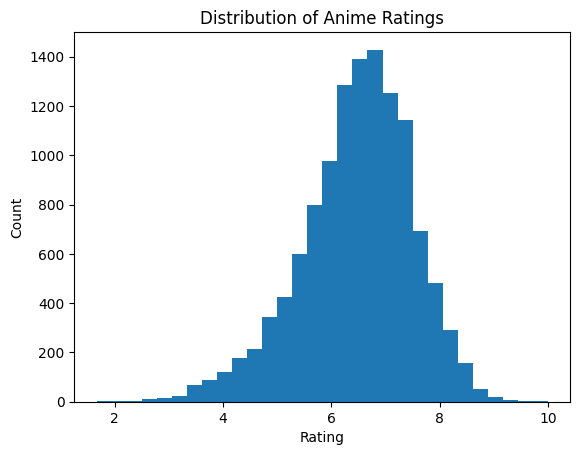

In [16]:
import matplotlib.pyplot as plt
plt.hist(anime['rating'], bins=30)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Anime Ratings")
plt.show()


In [17]:
anime.groupby('type')['rating'].mean().sort_values(ascending=False)


type
TV         6.902299
Special    6.523501
OVA        6.375221
Movie      6.318058
ONA        5.643298
Music      5.588996
Name: rating, dtype: float64

In [20]:
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')




In [21]:
anime['episodes'] = anime['episodes'].fillna(0)


In [22]:
bins = [-1, 1, 12, 24, 50, 2000]  # must be ascending
labels = ["Movie", "Short Series", "Standard TV", "Long Series", "Very Long"]

anime['ep_group'] = pd.cut(anime['episodes'], bins=bins, labels=labels)

anime.groupby('ep_group')['rating'].mean().sort_values(ascending=False)


/var/folders/vg/7h82fwbn555f9g64bbzl4np40000gn/T/ipykernel_76359/2286089004.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anime.groupby('ep_group')['rating'].mean().sort_values(ascending=False)


ep_group
Long Series     6.961290
Standard TV     6.950265
Very Long       6.850241
Short Series    6.543280
Movie           6.210659
Name: rating, dtype: float64

In [28]:
anime.sort_values(by='members', ascending=False).head(10)


,anime_id,name,genre,type,episodes,rating,members,genre_list,ep_group
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37.0,8.71,1013917,"[Mystery, Police, Psychological, Supernatural,...",Long Series
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.0,8.54,896229,"[Action, Drama, Fantasy, Shounen, Super Power]",Long Series
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.0,7.83,893100,"[Action, Adventure, Fantasy, Game, Romance]",Long Series
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",Very Long
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.0,8.39,717796,"[Action, Comedy, Drama, School, Supernatural]",Standard TV
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25.0,8.83,715151,"[Action, Mecha, Military, School, Sci-Fi, Supe...",Long Series
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297,"[Action, Comedy, Martial Arts, Shounen, Super ...",Very Long
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,"[Sci-Fi, Thriller]",Standard TV
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26.0,8.07,657190,"[Action, Mystery, Psychological, Shounen, Supe...",Long Series
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25.0,8.45,633817,"[Comedy, Romance, School, Slice of Life]",Long Series


In [29]:
anime[['rating', 'members']].corr()


,rating,members
rating,1.000000,0.387979
members,0.387979,1.000000


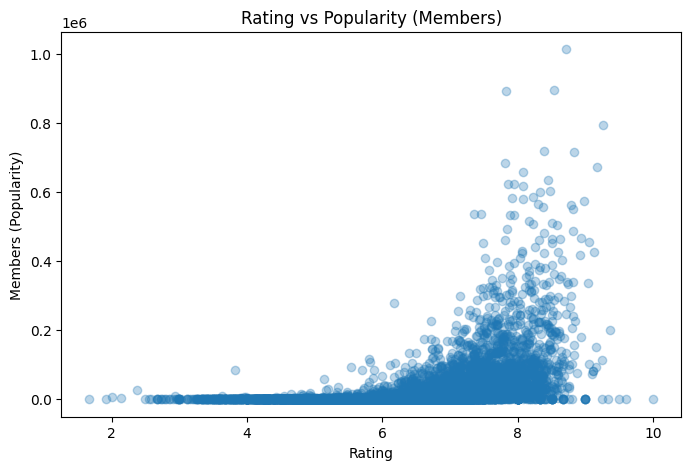

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(anime['rating'], anime['members'], alpha=0.3)
plt.xlabel("Rating")
plt.ylabel("Members (Popularity)")
plt.title("Rating vs Popularity (Members)")
plt.show()


In [31]:
from collections import Counter

genre_counter = Counter()

for genres in anime['genre_list']:
    genre_counter.update(genres)

genre_counter.most_common(15)


[('Comedy', 4575),
 ('Action', 2768),
 ('Adventure', 2316),
 ('Fantasy', 2242),
 ('Sci-Fi', 2036),
 ('Drama', 1977),
 ('Shounen', 1684),
 ('Kids', 1598),
 ('Romance', 1437),
 ('Slice of Life', 1204),
 ('School', 1176),
 ('Hentai', 1133),
 ('Supernatural', 1001),
 ('Mecha', 929),
 ('Music', 842)]

In [32]:
from itertools import combinations

pair_counter = Counter()

for g_list in anime['genre_list']:
    # get all possible pairs (combinations of 2)
    for pair in combinations(sorted(g_list), 2):
        pair_counter[pair] += 1

pair_counter.most_common(20)


[(('Action', 'Sci-Fi'), 1011),
 (('Adventure', 'Fantasy'), 928),
 (('Comedy', 'Shounen'), 925),
 (('Adventure', 'Comedy'), 903),
 (('Action', 'Adventure'), 871),
 (('Comedy', 'Fantasy'), 851),
 (('Action', 'Comedy'), 842),
 (('Action', 'Shounen'), 772),
 (('Comedy', 'Romance'), 753),
 (('Comedy', 'School'), 737),
 (('Mecha', 'Sci-Fi'), 712),
 (('Adventure', 'Shounen'), 695),
 (('Comedy', 'Slice of Life'), 688),
 (('Action', 'Fantasy'), 669),
 (('Adventure', 'Sci-Fi'), 648),
 (('Comedy', 'Sci-Fi'), 627),
 (('Action', 'Mecha'), 573),
 (('Comedy', 'Kids'), 555),
 (('Drama', 'Romance'), 537),
 (('Fantasy', 'Kids'), 519)]

In [33]:
anime.columns



Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'genre_list', 'ep_group'],
      dtype='object')

In [34]:
anime.groupby('type')['rating'].mean().sort_values(ascending=False)


type
TV         6.902299
Special    6.523501
OVA        6.375221
Movie      6.318058
ONA        5.643298
Music      5.588996
Name: rating, dtype: float64

In [35]:
anime.groupby('type')['members'].mean().sort_values(ascending=False)


type
TV         43774.971670
Movie      10392.398346
Special     7691.870138
OVA         6013.899543
ONA         4150.253067
Music       1311.840164
Name: members, dtype: float64

In [36]:
anime['type'].value_counts()


type
TV         3671
OVA        3285
Movie      2297
Special    1671
ONA         652
Music       488
Name: count, dtype: int64

In [37]:
anime['num_genres'] = anime['genre_list'].apply(len)


In [38]:
anime[['rating', 'episodes', 'members', 'num_genres']].corr()


,rating,episodes,members,num_genres
rating,1.000000,0.089256,0.387979,0.416298
episodes,0.089256,1.000000,0.056356,0.053210
members,0.387979,0.056356,1.000000,0.291329
num_genres,0.416298,0.053210,0.291329,1.000000


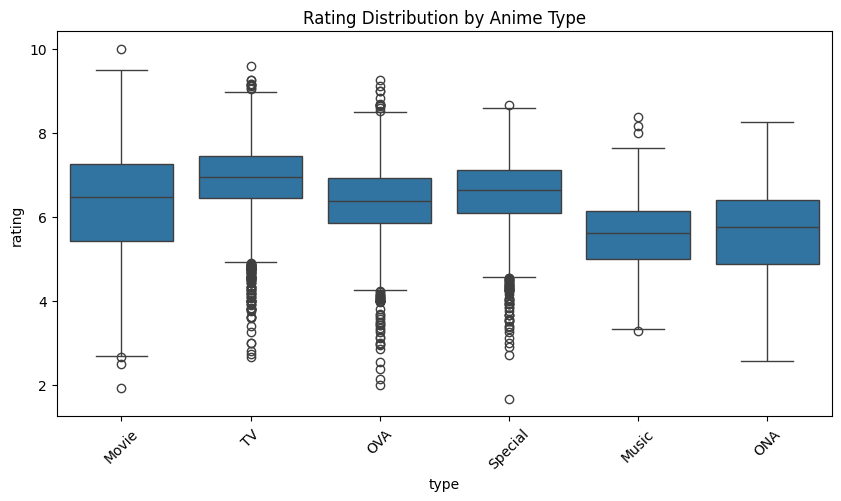

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='rating', data=anime)
plt.xticks(rotation=45)
plt.title("Rating Distribution by Anime Type")
plt.show()


In [41]:
anime.groupby('type')['rating'].mean().sort_values(ascending=False)


type
TV         6.902299
Special    6.523501
OVA        6.375221
Movie      6.318058
ONA        5.643298
Music      5.588996
Name: rating, dtype: float64

In [42]:
anime['type'].value_counts()


type
TV         3671
OVA        3285
Movie      2297
Special    1671
ONA         652
Music       488
Name: count, dtype: int64

In [43]:
anime.groupby('type')['members'].mean().sort_values(ascending=False)


type
TV         43774.971670
Movie      10392.398346
Special     7691.870138
OVA         6013.899543
ONA         4150.253067
Music       1311.840164
Name: members, dtype: float64

In [44]:
anime.sort_values(by='rating', ascending=False).head(20)



,anime_id,name,genre,type,episodes,rating,members,genre_list,ep_group,num_genres
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1.0,10.00,13,"[Comedy, Parody]",Movie,2
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,0.0,9.60,47,"[Adventure, Kids]",Movie,2
9595,23005,Mogura no Motoro,Slice of Life,Movie,1.0,9.50,62,[Slice of Life],Movie,1
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,"[Drama, Romance, School, Supernatural]",Movie,4
9078,33607,Kahei no Umi,Historical,Movie,1.0,9.33,44,[Historical],Movie,1
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",Very Long,7
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ...",Very Long,7
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1.0,9.25,53,"[Drama, Kids]",Movie,2
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,"[Sci-Fi, Thriller]",Standard TV,2
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ...",Very Long,7


In [45]:
import re

def extract_year(title):
    match = re.search(r'\((\d{4})\)', str(title))
    if match:
        return int(match.group(1))
    return None

anime['year'] = anime['name'].apply(extract_year)


In [46]:
anime['year'].value_counts().sort_index().tail(20)


year
1996.0    5
1997.0    2
1998.0    1
1999.0    4
2000.0    2
2001.0    3
2003.0    2
2004.0    3
2005.0    6
2006.0    5
2007.0    1
2008.0    2
2009.0    4
2010.0    2
2011.0    4
2012.0    7
2013.0    3
2014.0    6
2015.0    6
2016.0    6
Name: count, dtype: int64

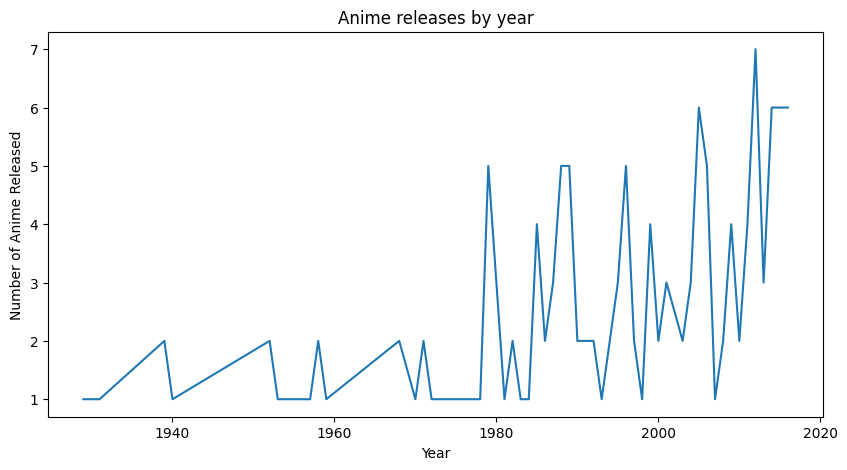

In [47]:
anime_year_counts = anime['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(anime_year_counts.index, anime_year_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Anime Released")
plt.title("Anime releases by year")
plt.show()


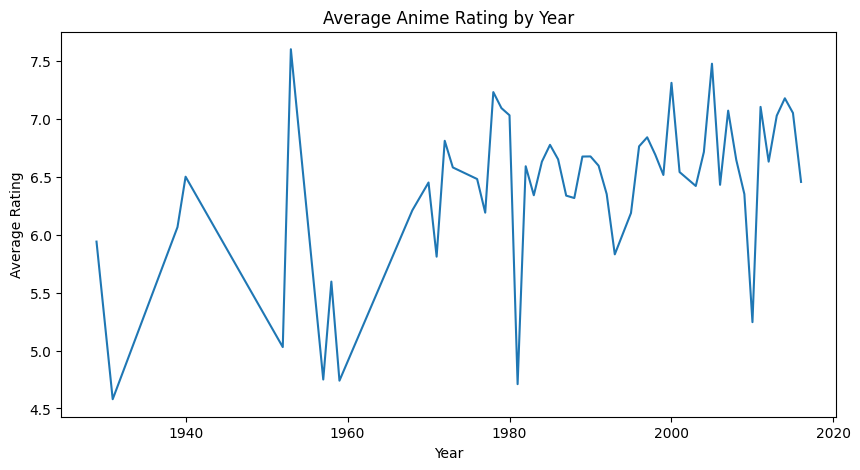

In [48]:
anime.groupby('year')['rating'].mean().plot(kind='line', figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Anime Rating by Year")
plt.show()


In [50]:
import re

def extract_year(name):
    match = re.search(r'\((\d{4})\)', name)
    if match:
        return int(match.group(1))
    return None

anime['year'] = anime['name'].apply(extract_year)



In [51]:
anime['year'].value_counts().sort_index().head(20)


year
1929.0    1
1931.0    1
1939.0    2
1940.0    1
1952.0    2
1953.0    1
1957.0    1
1958.0    2
1959.0    1
1968.0    2
1970.0    1
1971.0    2
1972.0    1
1973.0    1
1976.0    1
1977.0    1
1978.0    1
1979.0    5
1980.0    3
1981.0    1
Name: count, dtype: int64

In [52]:
yearly_rating = anime.groupby('year')['rating'].mean()
yearly_rating


year
1929.0    5.940000
1931.0    4.580000
1939.0    6.065000
1940.0    6.500000
1952.0    5.030000
1953.0    7.600000
1957.0    4.750000
1958.0    5.595000
1959.0    4.740000
1968.0    6.210000
1970.0    6.450000
1971.0    5.810000
1972.0    6.810000
1973.0    6.580000
1976.0    6.480000
1977.0    6.190000
1978.0    7.230000
1979.0    7.092000
1980.0    7.030000
1981.0    4.710000
1982.0    6.590000
1983.0    6.340000
1984.0    6.630000
1985.0    6.775000
1986.0    6.650000
1987.0    6.336667
1988.0    6.316000
1989.0    6.674000
1990.0    6.675000
1991.0    6.595000
1992.0    6.350000
1993.0    5.830000
1995.0    6.186667
1996.0    6.762000
1997.0    6.840000
1998.0    6.690000
1999.0    6.515000
2000.0    7.310000
2001.0    6.540000
2003.0    6.420000
2004.0    6.713333
2005.0    7.475000
2006.0    6.430000
2007.0    7.070000
2008.0    6.645000
2009.0    6.350000
2010.0    5.245000
2011.0    7.102500
2012.0    6.630000
2013.0    7.026667
2014.0    7.176667
2015.0    7.050000
2016.0 

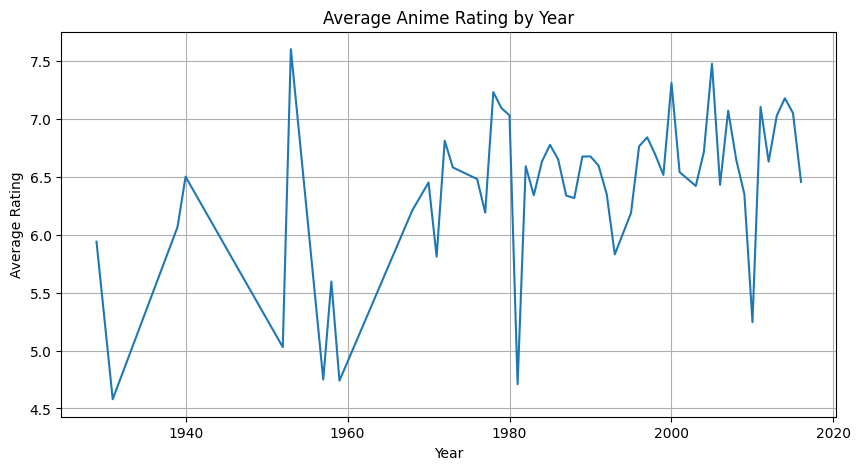

In [53]:
plt.figure(figsize=(10,5))
plt.plot(yearly_rating.index, yearly_rating.values)
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Anime Rating by Year")
plt.grid(True)
plt.show()


In [54]:
mean_rating = anime['rating'].mean()
median_rating = anime['rating'].median()
skew_rating = anime['rating'].skew()            # tells you shape (left/right)
mean_rating, median_rating, skew_rating


(np.float64(6.473901690981432),
 np.float64(6.57),
 np.float64(-0.5435700688578504))

In [55]:
anime.shape, ratings.shape


((12064, 11), (7813737, 3))

In [56]:
anime.sort_values(by='members', ascending=False).head(5)



,anime_id,name,genre,type,episodes,rating,members,genre_list,ep_group,num_genres,year
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37.0,8.71,1013917,"[Mystery, Police, Psychological, Supernatural,...",Long Series,5,NaN
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.0,8.54,896229,"[Action, Drama, Fantasy, Shounen, Super Power]",Long Series,5,NaN
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.0,7.83,893100,"[Action, Adventure, Fantasy, Game, Romance]",Long Series,5,NaN
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",Very Long,7,NaN
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.0,8.39,717796,"[Action, Comedy, Drama, School, Supernatural]",Standard TV,5,NaN


In [57]:
anime[['rating','members']].corr()


,rating,members
rating,1.000000,0.387979
members,0.387979,1.000000


In [58]:
# 3: Popularity vs Rating
corr = anime['rating'].corr(anime['members'])
print("Correlation (rating, members) =", corr)

# Few examples: popular but lower rating
popular_low = anime.sort_values(by='members', ascending=False).query("rating < 7").head(5)
print("\nTop popular anime with rating < 7 (popular but low-rated):")
display(popular_low[['name','rating','members','type','ep_group']])

# Highly rated but low popularity (hidden gems)
hidden_gems = anime.sort_values(by='rating', ascending=False).query("members < 50000").head(5)
print("\nHighly rated but low-members (hidden gems):")
display(hidden_gems[['name','rating','members','type','ep_group']])


Correlation (rating, members) = 0.38797945850031623

Top popular anime with rating < 7 (popular but low-rated):


,name,rating,members,type,ep_group
6324,School Days,6.17,279183,TV,Short Series
4444,Dragon Ball GT,6.72,226625,TV,Very Long
4828,ChäoS;HEAd,6.62,174337,TV,Short Series
4480,"Yosuga no Sora: In Solitude, Where We Are Leas...",6.72,173216,TV,Short Series
3518,"Dakara Boku wa, H ga Dekinai.",6.96,169615,TV,Short Series



Highly rated but low-members (hidden gems):


,name,rating,members,type,ep_group
10464,Taka no Tsume 8: Yoshida-kun no X-Files,10.00,13,Movie,Movie
10400,Spoon-hime no Swing Kitchen,9.60,47,TV,Movie
9595,Mogura no Motoro,9.50,62,Movie,Movie
9078,Kahei no Umi,9.33,44,Movie,Movie
10786,Yakusoku: Africa Mizu to Midori,9.25,53,OVA,Movie


In [59]:
anime.groupby('ep_group')['rating'].mean().sort_values(ascending=False)


/var/folders/vg/7h82fwbn555f9g64bbzl4np40000gn/T/ipykernel_76359/4281137827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anime.groupby('ep_group')['rating'].mean().sort_values(ascending=False)


ep_group
Long Series     6.961290
Standard TV     6.950265
Very Long       6.850241
Short Series    6.543280
Movie           6.210659
Name: rating, dtype: float64

In [60]:
from collections import Counter

genre_counter = Counter()

for g_list in anime['genre_list']:
    for g in g_list:
        genre_counter[g] += 1

genre_counter.most_common(10)


[('Comedy', 4575),
 ('Action', 2768),
 ('Adventure', 2316),
 ('Fantasy', 2242),
 ('Sci-Fi', 2036),
 ('Drama', 1977),
 ('Shounen', 1684),
 ('Kids', 1598),
 ('Romance', 1437),
 ('Slice of Life', 1204)]

In [61]:
genre_rating = (
    anime.explode('genre_list')
         .groupby('genre_list')['rating']
         .mean()
         .reset_index()
)

genre_rating.sort_values(by='rating', ascending=False).head(10)


,genre_list,rating
14,Josei,7.443077
39,Thriller,7.382326
21,Mystery,7.232412
23,Police,7.122051
32,Shounen,7.057553
24,Psychological,7.010398
19,Military,7.004904
38,Supernatural,7.000380
25,Romance,6.999054
31,Shoujo Ai,6.978148


In [62]:
from collections import Counter
from itertools import combinations

pair_counter = Counter()

for genre_list in anime['genre_list']:
    pairs = combinations(sorted(genre_list), 2)   # all 2-genre combos
    for p in pairs:
        pair_counter[p] += 1

pair_counter.most_common(10)


[(('Action', 'Sci-Fi'), 1011),
 (('Adventure', 'Fantasy'), 928),
 (('Comedy', 'Shounen'), 925),
 (('Adventure', 'Comedy'), 903),
 (('Action', 'Adventure'), 871),
 (('Comedy', 'Fantasy'), 851),
 (('Action', 'Comedy'), 842),
 (('Action', 'Shounen'), 772),
 (('Comedy', 'Romance'), 753),
 (('Comedy', 'School'), 737)]

In [63]:
anime.to_csv("cleaned_anime.csv", index=False)
